### 这是一个解析GPS经纬度的python程序

#### 原始文件解析

In [3]:
import re
import pandas as pd

# 定义一个函数来提取经纬度
def extract_coordinates(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
    coordinates = []
    
    for line in lines:
        # 匹配GNRMC和GNGLL行中的经纬度信息
        if line.startswith('$GNRMC') or line.startswith('$GNGLL'):
            # 使用正则表达式匹配纬度、经度及其方向（N/S，E/W）
            match = re.search(r'(\d{2})(\d{2}\.\d+),([NS]),(\d{3})(\d{2}\.\d+),([EW])', line)
            if match:
                # 提取纬度和经度
                lat_deg, lat_min, lat_dir, lon_deg, lon_min, lon_dir = match.groups()
                
                # 将纬度和经度转换为小数度
                latitude = float(lat_deg) + float(lat_min) / 60.0
                longitude = float(lon_deg) + float(lon_min) / 60.0
                
                # 根据方向调整经纬度的正负
                if lat_dir == 'S':
                    latitude = -latitude
                if lon_dir == 'W':
                    longitude = -longitude
                
                coordinates.append((latitude, longitude))
    
    return coordinates

# 使用示例，假设文本文件名为 "nmea_data.txt"
file_path = './data/GPS20241015_1.txt'
coords = extract_coordinates(file_path)

# 输出结果
lat_list, lng_list = [], []
for lat, lng in coords:
    print(f"Latitude: {lat}, Longitude: {lng}")
    lat_list.append(lat)
    lng_list.append(lng)

res = pd.DataFrame({'lat': lat_list, 'lng': lng_list})
# res.to_csv('GPS20241015_1.csv', index=False)

Latitude: 36.33590066666667, Longitude: 120.7306915
Latitude: 36.33590066666667, Longitude: 120.7306915
Latitude: 36.335900333333335, Longitude: 120.73069066666666
Latitude: 36.335900333333335, Longitude: 120.73069066666666
Latitude: 36.33590066666667, Longitude: 120.73069116666667
Latitude: 36.33590066666667, Longitude: 120.73069116666667
Latitude: 36.335900333333335, Longitude: 120.73069083333333
Latitude: 36.335900333333335, Longitude: 120.73069083333333
Latitude: 36.335899833333336, Longitude: 120.73068966666666
Latitude: 36.335899833333336, Longitude: 120.73068966666666
Latitude: 36.33590016666667, Longitude: 120.73069033333333
Latitude: 36.33590016666667, Longitude: 120.73069033333333
Latitude: 36.335899833333336, Longitude: 120.73069033333333
Latitude: 36.335899833333336, Longitude: 120.73069033333333
Latitude: 36.33589933333333, Longitude: 120.73068933333333
Latitude: 36.33589933333333, Longitude: 120.73068933333333
Latitude: 36.33589966666667, Longitude: 120.73069016666666
Lat

#### 绘制移动轨迹

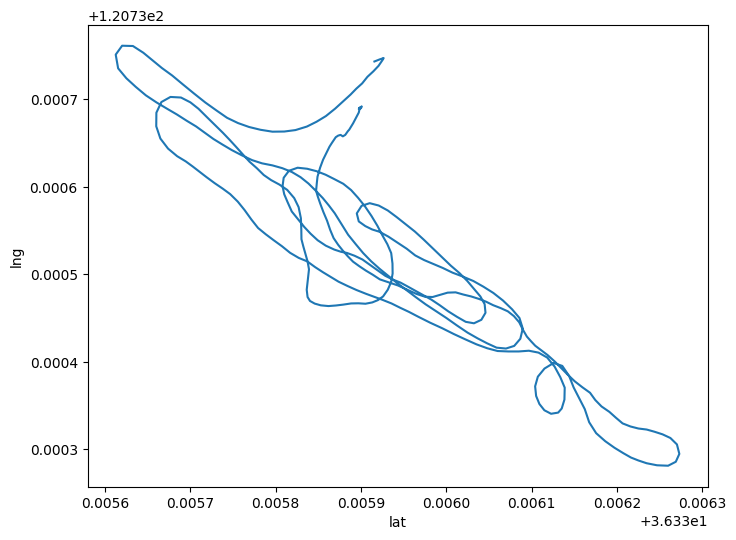

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
plt.plot(res['lat'], res['lng'])
plt.xlabel('lat')
plt.ylabel('lng')
plt.show()


#### 将经纬度坐标转化为平面直角坐标

In [7]:
import numpy as np

# 地球半径，单位：米
R = 6371000  

# 经纬度转换为米的函数
def convert_to_cartesian(latitudes, longitudes):
    x_coords = []
    y_coords = []

    for lat, lon in zip(latitudes, longitudes):
        # 将纬度和经度转换为弧度
        lat_rad = np.radians(lat)
        lon_rad = np.radians(lon)

        # 计算直角坐标系下的坐标
        x = R * lon_rad * np.cos(lat_rad)
        y = R * lat_rad

        x_coords.append(x)
        y_coords.append(y)

    return x_coords, y_coords

# 绘制轨迹的函数
def plot_gps_trajectory(x_coords, y_coords):
    # 计算坐标的中心点
    center_x = np.mean(x_coords)
    center_y = np.mean(y_coords)

    # 将坐标平移使得中心点为原点 (0, 0)
    x_coords_shifted = [x - center_x for x in x_coords]
    y_coords_shifted = [y - center_y for y in y_coords]

    plt.figure(figsize=(10, 6))
    plt.plot(x_coords_shifted, y_coords_shifted, linestyle='-', color='b')
    plt.title('GPS Trajectory (Cartesian Coordinates)')
    plt.xlabel('X Coordinate (m)')
    plt.ylabel('Y Coordinate (m)')
    plt.grid()
    plt.axis('equal')

    # 设置坐标轴限制，使轨迹填满绘图区域
    plt.xlim(min(x_coords_shifted), max(x_coords_shifted))
    plt.ylim(min(y_coords_shifted), max(y_coords_shifted))

    # 添加轴线
    plt.axhline(0, color='gray', lw=0.5, ls='--')  # 添加 y=0 的水平线
    plt.axvline(0, color='gray', lw=0.5, ls='--')  # 添加 x=0 的垂直线

    plt.show()

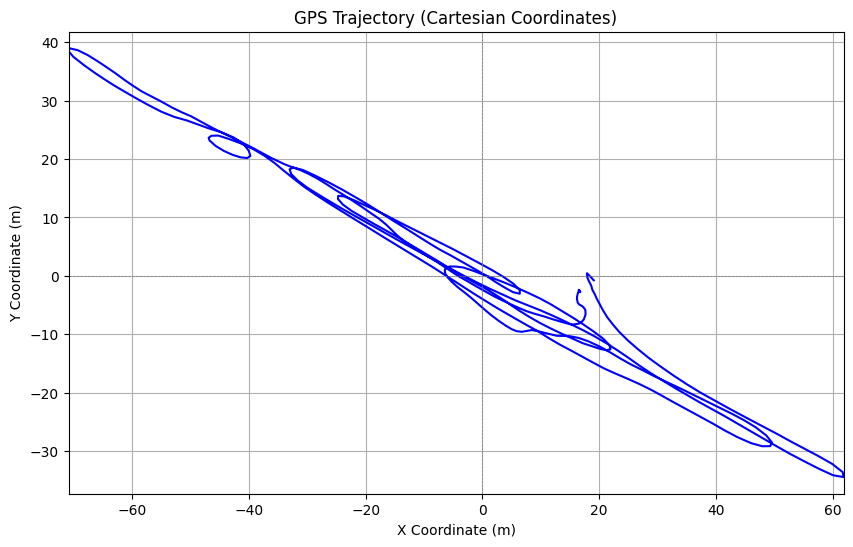

In [8]:
x_coords, y_coords = convert_to_cartesian(res['lat'], res['lng'])
plot_gps_trajectory(x_coords, y_coords)

In [ ]:
## read me